___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
df = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [5]:
df.head().T

,0,1,2,3,4
credit.policy,1,1,1,1,1
purpose,debt_consolidation,credit_card,debt_consolidation,debt_consolidation,credit_card
int.rate,0.1189,0.1071,0.1357,0.1008,0.1426
installment,829.1,228.22,366.86,162.34,102.92
log.annual.inc,11.350407,11.082143,10.373491,11.350407,11.299732
dti,19.48,14.29,11.63,8.1,14.97
fico,737,707,682,712,667
days.with.cr.line,5639.958333,2760.0,4710.0,2699.958333,4066.0
revol.bal,28854,33623,3511,33667,4740
revol.util,52.1,76.7,25.6,73.2,39.5


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

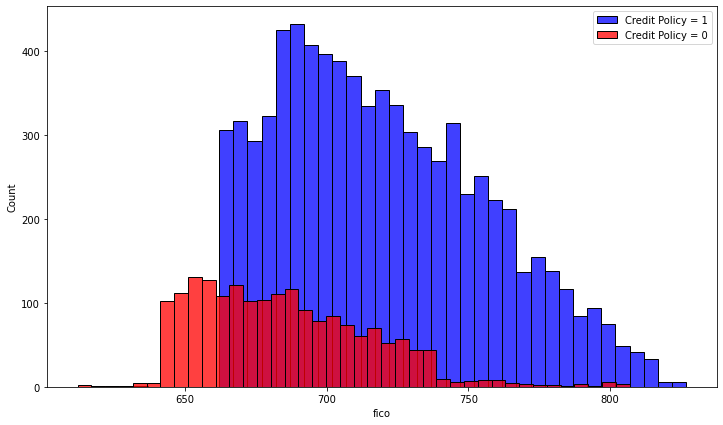

In [12]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['credit.policy']==1]['fico'], bins=40, color='blue', label='Credit Policy = 1')
sns.histplot(df[df['credit.policy']==0]['fico'], bins=40, color='red', label='Credit Policy = 0')
plt.legend()
plt.show()

** Create a similar figure, except this time select by the not.fully.paid column.**

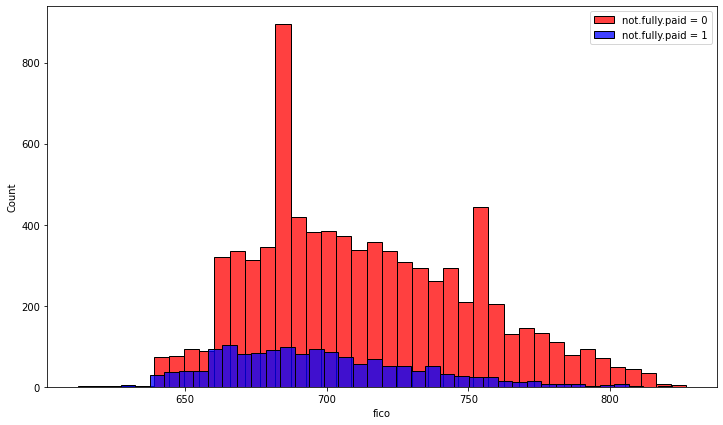

In [14]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['not.fully.paid']==0]['fico'], bins=40, color='red', label='not.fully.paid = 0')
sns.histplot(df[df['not.fully.paid']==1]['fico'], bins=40, color='blue', label='not.fully.paid = 1')
plt.legend()
plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

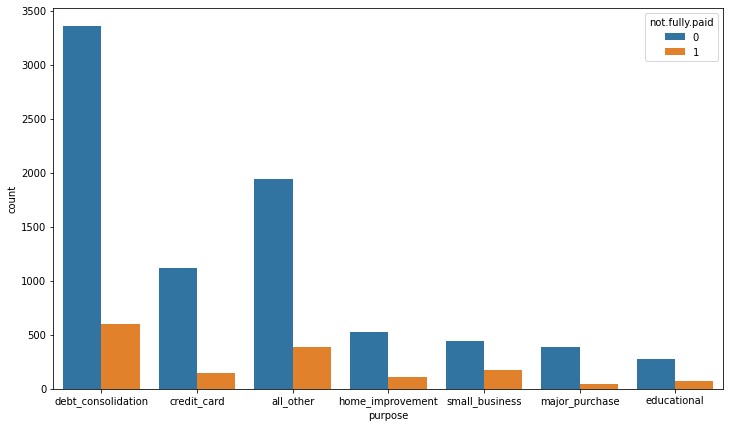

In [17]:
plt.figure(figsize=(12,7))
sns.countplot(x= 'purpose',data= df,hue='not.fully.paid')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

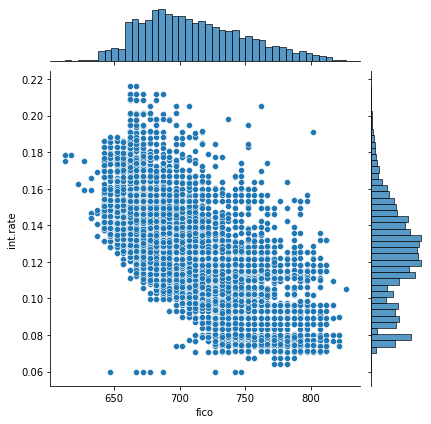

In [18]:
sns.jointplot(x='fico',y='int.rate',data=df)

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

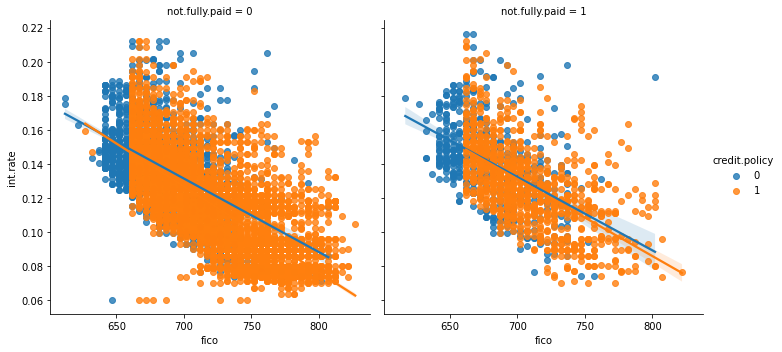

In [19]:
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid')

<AxesSubplot:>

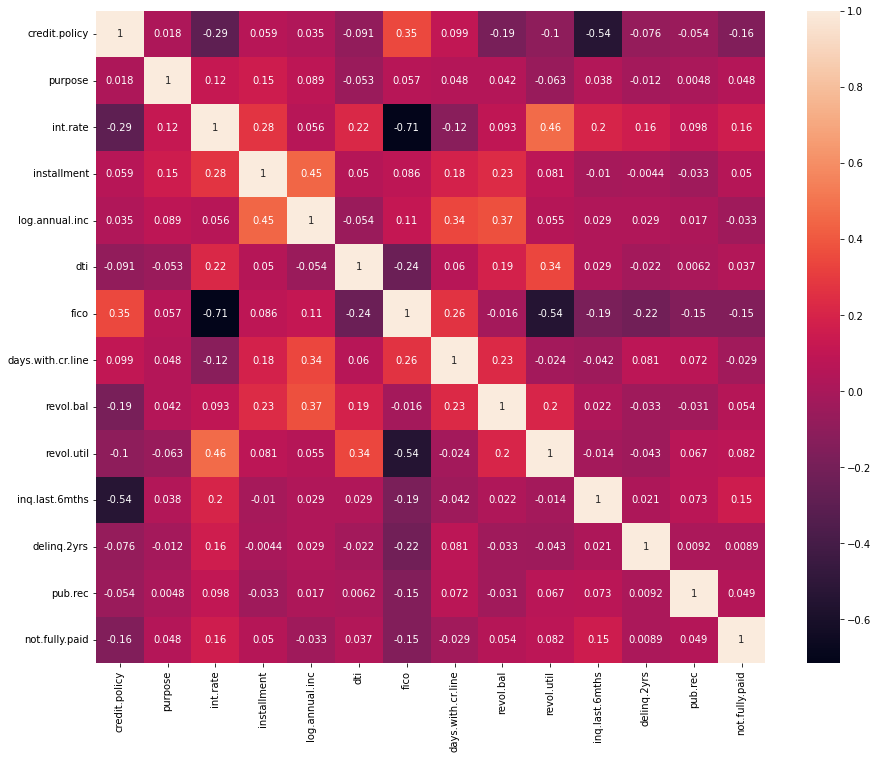

In [55]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [56]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [59]:
df.drop(['delinq.2yrs'],axis=1,inplace=True)

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int8   
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
 12  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(6), int8(1)
memory usage: 907.4 KB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.


In [61]:
df['purpose'] = df['purpose'].astype('category')
df['purpose'] = df['purpose'].cat.codes

In [62]:
df['purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3], dtype=int8)

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop(['not.fully.paid'],axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [64]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [65]:
dtree = DecisionTreeClassifier()

In [66]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [67]:
y_pred = dtree.predict(X_test)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.21      0.22      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



<AxesSubplot:>

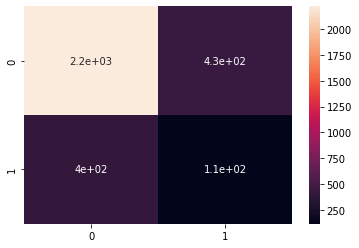

In [70]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier()

In [73]:
rf.fit(X_train,y_train)

RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [74]:
y_pred = rf.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.39      0.03      0.05       511

    accuracy                           0.84      3161
   macro avg       0.61      0.51      0.48      3161
weighted avg       0.77      0.84      0.77      3161



**Show the Confusion Matrix for the predictions.**

<AxesSubplot:>

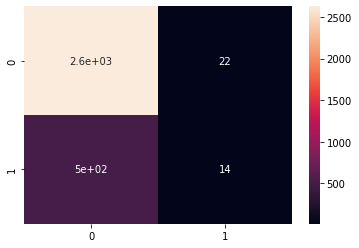

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

**What performed better the random forest or the decision tree?**

This depend upon need of your company and how do you want to make your model perform based all domain knowledge you have.

# Great Job!